# Sanitization Process for Data Privacy

As good as data can be now a days, it must satisfy several requirements for it to be made public. A natural trade-off arises between privacy and utility of a dataset. On one side, data satisfies certain privacy concerns to prevent sensitive information from being revealed. On the other side, for inference and conclusions to be taken from a dataset, data should be available for people whose interest is to analyze it. Data security focus it's effort on avoiding data to be accessed, while data privacy focus their effort on a controlled access to the data. This work will focus on privacy as a controlled access to data, and it can be seen in the context that analysis rely on data quality, and the more quality, the better for it's users. Work has been done to make sure data follows the corresponding privacy constraints by applying the sanitization process through different approaches like generalization, suppression, etc. all with the aim of making data less informative (more private). The purpose of this work is to explore new approaches for sanitization of databases and to measure their performance.
The benefits for data to be made public are many, some of these are the following:
+ The open data culture reduces barriers across different sectors and allow collaboration between them, creating an environment for more efficient and innovative services and policies.
+ In many ways it's a form to increase transparency and citizenship participation.

The contributions in this work is a new type of operator for sanitizing that that includes as parameters the option of including the real value, and changing the distribution of the weights over the possible values. Also a new method for reconstructing the original database from measuring sanitized database utility will be introduced.

## Analyse the Supervised Set

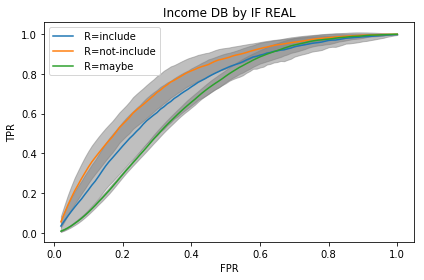

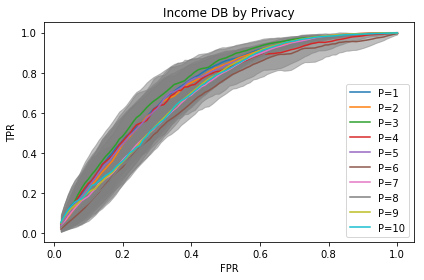

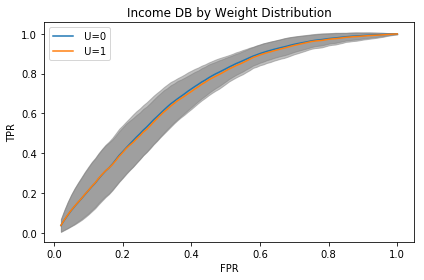

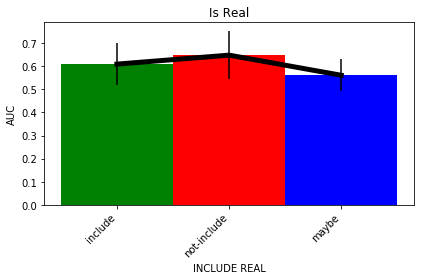

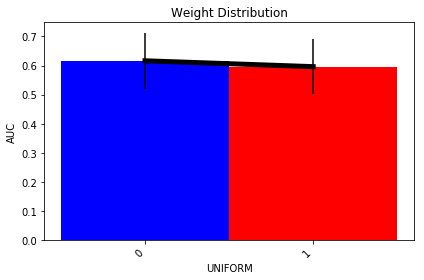

/home/juanzinser/Workspace/data_sanitization/venv/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


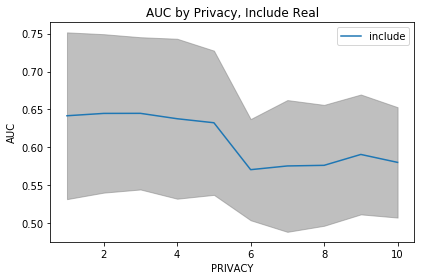

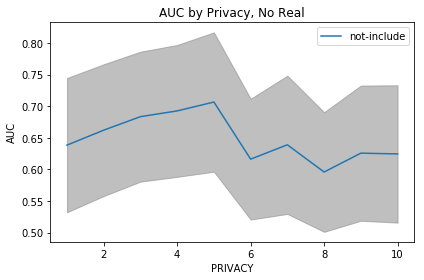

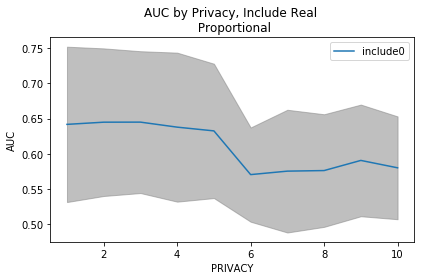

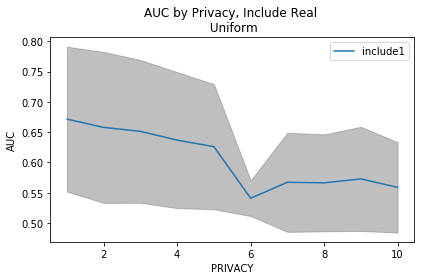

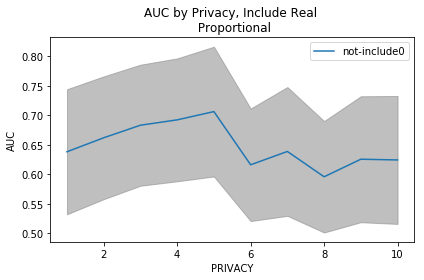

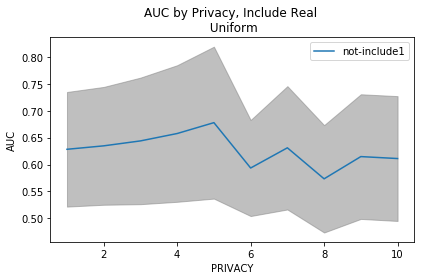

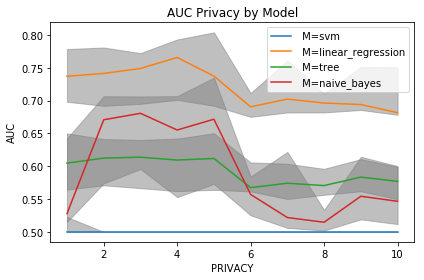

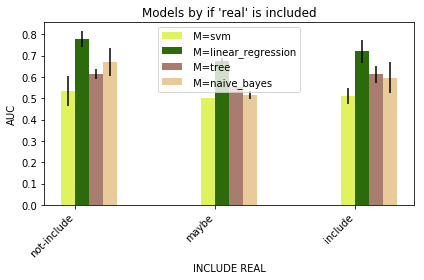

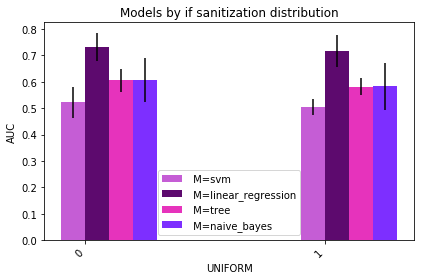

In [3]:
from sanitization_tools import *
supervised_results = pn.read_csv("model_scores_roc.csv")
lang_labels = "english"
subfolder= ""
rocs_by_case(supervised_results, {},{"real":["t","f","m"]}, savefig=True, title="by IF REAL", save_name=subfolder + "income_roc_privacy_grouped_tmf",language=lang_labels)

rocs_by_case(supervised_results, {},{"privacy":[i for i in range(1,11)]}, savefig=True, title="by Privacy", 
             save_name=subfolder + "income_roc_privacy", language=lang_labels)
rocs_by_case(supervised_results, {},{"uniform":[0,1]}, savefig=True, title="by Weight Distribution", 
             save_name=subfolder + "income_roc_weight_distribution", language=lang_labels)


plot_bars_single_chunk(df = supervised_results, gb_param = "real",yaxis = "auc", base_filter = {}, 
                       lines_cases = {"real":["t","f","m"]}, savefig=True, title="Is Real", 
                       save_name=subfolder + "privacy_is_real", width_delta=.1, language=lang_labels)

plot_bars_single_chunk(df = supervised_results, gb_param = "uniform",yaxis = "auc", base_filter = {}, 
                       lines_cases = {"uniform":[0,1]}, savefig=True, title="Weight Distribution", 
                       save_name=subfolder + "weight_dist_bar", width_delta=.1, language=lang_labels)


# privacy plots line plots
rmse_auc_plot_with_intervals(df = supervised_results, gb_param = "privacy",yaxis = "auc", reals = ["t"],
                       uniforms = [None], uniforms2=[None], uniform_original=[None],models=[None], savefig=True, title="AUC by Privacy, Include Real", 
                       save_name=subfolder + "privacy_auc_t",  language=lang_labels)
rmse_auc_plot_with_intervals(df = supervised_results, gb_param = "privacy",yaxis = "auc", reals=["f"],
                       uniforms = [None], uniforms2=[None], uniform_original=[None],models=[None], savefig=True, title="AUC by Privacy, No Real", 
                       save_name=subfolder + "privacy_auc_f",  language=lang_labels)
rmse_auc_plot_with_intervals(df = supervised_results, gb_param = "privacy",yaxis = "auc", reals=["t"], 
                       uniforms = [0], uniforms2=[None], uniform_original=[None],models=[None], savefig=True, title="AUC by Privacy, Include Real \n Proportional", 
                       save_name=subfolder + "privacy_auc_t0", language=lang_labels)
rmse_auc_plot_with_intervals(df = supervised_results, gb_param = "privacy",yaxis = "auc", reals=["t"],  
                       uniforms = [1], uniforms2=[None], uniform_original=[None],models=[None], savefig=True, title="AUC by Privacy, Include Real \n Uniform", 
                       save_name=subfolder + "privacy_auc_t1", language=lang_labels)
rmse_auc_plot_with_intervals(df = supervised_results, gb_param = "privacy",yaxis = "auc", reals=["f"], 
                       uniforms = [0], uniforms2=[None], uniform_original=[None],models=[None], savefig=True, title="AUC by Privacy, Include Real \n Proportional", 
                       save_name=subfolder + "privacy_auc_f0", language=lang_labels)
rmse_auc_plot_with_intervals(df = supervised_results, gb_param = "privacy",yaxis = "auc", reals =["f"],
                       uniforms = [1], uniforms2=[None], uniform_original=[None],models=[None], savefig=True, title="AUC by Privacy, Include Real \n Uniform", 
                       save_name=subfolder + "privacy_auc_f1", language=lang_labels)

plot_intervals(supervised_results.copy(), "privacy","auc", {}, 
               {"model":["svm", "linear_regression", "tree", "naive_bayes"]}, savefig=True, 
               title="AUC Privacy by Model", save_name=subfolder + "auc_model_privacy", language=lang_labels)

plot_bars(supervised_results.copy(), "real", "auc", {}, 
               {"model":["svm", "linear_regression", "tree", "naive_bayes"]}, savefig=True, 
               title="Models by if 'real' is included", save_name=subfolder + "include_real_model", width_delta=.1, language=lang_labels)

plot_bars(supervised_results.copy(), "uniform", "auc", {}, 
               {"model":["svm", "linear_regression", "tree", "naive_bayes"]}, savefig=True, 
               title="Models by if sanitization distribution", save_name=subfolder + "uniform_model", width_delta=.1, language=lang_labels)


## Analyse the Non-Supervised Set

/home/juanzinser/Workspace/data_sanitization/venv/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


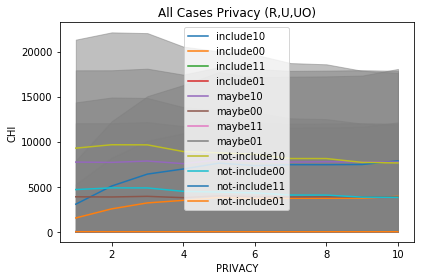

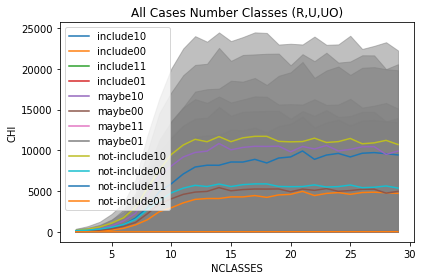

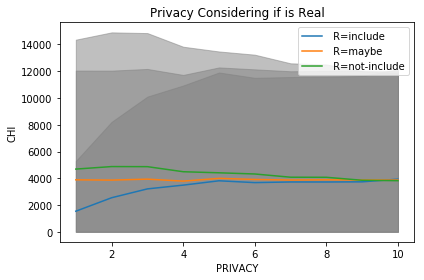

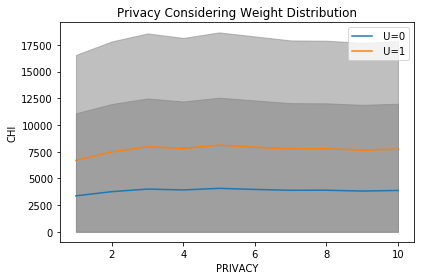

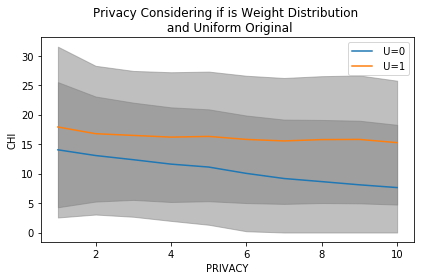

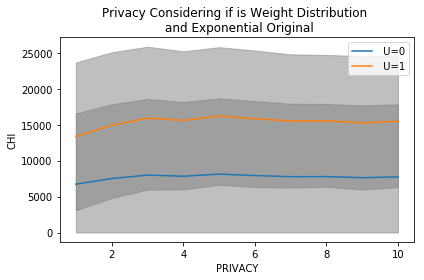

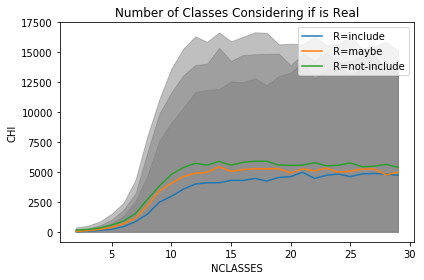

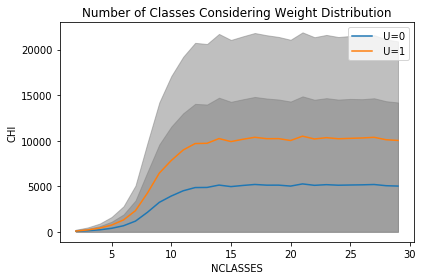

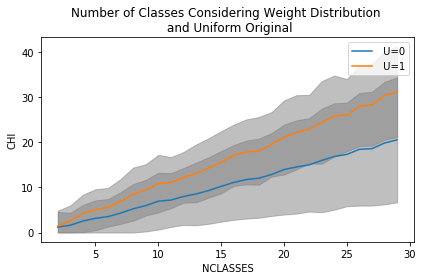

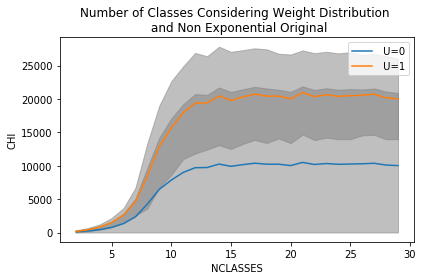

In [4]:
from sanitization_tools import *
non_supervised_results = pn.read_csv("df_simulated_rel.csv")


rmse_auc_plot_with_intervals(non_supervised_results, "privacy", "chi", 
                           ["t", "m", "f"], [None], [None], [0,1], [None],
                            {("uniform","uniform2"):[(1,1),(0,0)]}, savefig=True, 
                           title="All Cases Privacy (R,U,UO)", save_name=subfolder + "privacy", language=lang_labels)
rmse_auc_plot_with_intervals(non_supervised_results, "nclasses", "chi", 
                           ["t", "m", "f"], [None], [None], [0,1], [None],
                            {("uniform","uniform2"):[(1,1),(0,0)]}, savefig=True, 
                           title="All Cases Number Classes (R,U,UO)", save_name=subfolder + "nclasses", language=lang_labels)


plot_intervals_std(non_supervised_results, "privacy","chi", {},
                   {"real":["t", "m", "f"]}, savefig=True, title="Privacy Considering if is Real", save_name=subfolder + "privacy_isreal", language=lang_labels)
plot_intervals_std(non_supervised_results, "privacy","chi", {},
                   {"uniform":[0,1]}, savefig=True, title="Privacy Considering Weight Distribution", save_name=subfolder + "privacy_uniform", language=lang_labels)
plot_intervals_std(non_supervised_results, "privacy","chi", {"uniform_original":[1]},
                   {"uniform":[0,1]}, savefig=True, title="Privacy Considering if is Weight Distribution \n and Uniform Original", save_name=subfolder + "privacy_uniform_original1", language=lang_labels)
plot_intervals_std(non_supervised_results, "privacy","chi", {"uniform_original":[0]},
                   {"uniform":[0,1]}, savefig=True, title="Privacy Considering if is Weight Distribution \n and Exponential Original", save_name=subfolder + "privacy_uniform_original0", language=lang_labels)

plot_intervals_std(non_supervised_results, "nclasses","chi", {},
                   {"real":["t", "m", "f"]}, savefig=True, title="Number of Classes Considering if is Real", save_name=subfolder + "nclasses_isreal", language=lang_labels)
plot_intervals_std(non_supervised_results, "nclasses","chi", {},
                   {"uniform":[0,1]}, savefig=True, title="Number of Classes Considering Weight Distribution", save_name=subfolder + "nclasses_uniform", language=lang_labels)
plot_intervals_std(non_supervised_results, "nclasses","chi", {"uniform_original":[1]},
                   {"uniform":[0,1]}, savefig=True, title="Number of Classes Considering Weight Distribution \n and Uniform Original", save_name=subfolder + "nclassses_uniform_original1", language=lang_labels)
plot_intervals_std(non_supervised_results, "nclasses","chi", {"uniform_original":[0]},
                   {"uniform":[0,1]}, savefig=True, title="Number of Classes Considering Weight Distribution \n and Non Exponential Original", save_name=subfolder + "nclasses_uniform_original0", language=lang_labels)


There are a few factors to consider to evaluate if there is a gain in the simulations done. First of all is if the chi-square is low for the given case. A low chi-square is good since it tells us that in an overall manner, the value counts are similar. However, besides the level of privacy as was defined below, it is important to consider how easy it is for the attacker to identify a given entry. Also it is important to consider if the attacker or the general public knows the method use for the sanitization, because that will certainly give additional valuable information that will help for the attacker to uncover the information.

Based on the plots of the previous chapters the following can be concluded.
First considering the supervised dataset results:
+ A sanitization maybe considering the real value has the worst performance in terms if AUC of the model. Not considering the real value has the best performance and considering the real value has a performance between the two.
+ Analyzing the AUC, when the real value is considered or maybe considered the models have a better performance when using the proportional distribution in the sanitization over the uniform distribution. When the real value is not considered the uniform distribution has a better performance than the proportional.
+ After performing sanitization without including the real value, it is better to use naive bayes classifier over the simple tree classifier. However if the real value is included or maybe is included the tree classifiers had a better performance than the naive bayes classifier. The naive bayes classifier is the most sensitive to privacy levels (dispersion).
+ The sanitization distribution doesn't have an effect with the model performance, for the 4 models analyzed (tree, naive bayes, svm and linear regression).

Considering the non-supervised dataset results:
+  When the original data has a non-uniform distribution (exponential in this case) and the sanitization distribution is uniform, the chi-square of the histogram similarity result is the highest, at around 8000.
+ When the original data has a non-uniform distribution (exponential in this case) and the sanitization distribution is proportional to the data (therefore exponential), the chi-square of the histogram similarity is at around 4000.
+ When the original data has a uniform distribution and the sanitization distribution is proportional (therefore similar to uniform), the chi-square of the histogram similarity is close to zero.
+ Having less than 10 total classes, makes less important the choice of the sanitization parameters since the chi-square of the histogram similarity is increasing with the number of classes but close between them. Above 10 classes is convenient to choose proportional distribution when the original values are exponential, which makes sense in the way that uniform values would be distant from the exponential ones, producing different histograms and higher chi-square.
+ When the level of privacy is higher that 40\% (percentage of total number of classes), the is real parameter has a small effect, since chi-square results converge with privacy levels higher that that one.
+ It is better that the distribution of the weights is closer real proportion of values, if the uniform distribution is used over skewed data the chi-square will tend to be very high.

The possible future work might include analyzing the effect of changing the two distributions $s_1$ and $s_2$, this means that the distribution from which the class values are sampled and the distribution that assigns the weights to the sample values might be different. As a remainder the two distributions are included as parameters of the operator, but for this work only the case where both are the same is considered.